In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

'''
0이 500개, 1이 500개, ..., 10이 500개
총 5000개의 글자가 있음

0은 가로 5 x 세로 100을 차지하고 있음
픽셀로 따지면 가로는 0~100픽셀, 세로는 0~2000픽셀
'''

# 세로로 50줄, 가로로 100줄로 사진을 나눕니다.
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

# 각 (20 X 20) 크기의 사진을 한 줄(1 X 400)으로 바꿉니다.
train = x[:, :].reshape(-1, 400).astype(np.float32)
print(train.shape)

# 0이 500개, 1이 500개, ... 로 총 5,000개가 들어가는 (1 x 5000) 배열을 만듭니다.
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)

np.savez("trained.npz", train=train, train_labels=train_labels)


(50, 100, 20, 20)
(5000, 400)
(5000, 1)


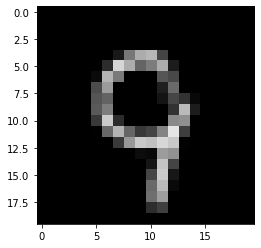

In [2]:
# 다음과 같이 하나씩 글자를 출력할 수 있습니다.
plt.imshow(cv2.cvtColor(x[48, 1], cv2.COLOR_GRAY2RGB))
plt.show()

# 다음과 같이 하나씩 글자를 저장할 수 있습니다.
# cv2.imwrite('test_0.png', x[0, 0])
# cv2.imwrite('test_1.png', x[5, 0])
# cv2.imwrite('test_2.png', x[10, 0])
# cv2.imwrite('test_3.png', x[15, 0])
# cv2.imwrite('test_4.png', x[20, 0])
# cv2.imwrite('test_5.png', x[25, 0])
# cv2.imwrite('test_6.png', x[30, 0])
# cv2.imwrite('test_7.png', x[35, 0])
# cv2.imwrite('test_8.png', x[40, 0])
# cv2.imwrite('test_9.png', x[45, 0])

In [3]:
FILE_NAME = 'trained.npz'
# 파일로부터 학습 데이터를 불러옵니다.
def load_train_data(file_name):
    with np.load(file_name) as data:
        train = data['train']
        train_labels = data['train_labels']
    return train, train_labels

# 손 글씨 이미지를 (20 x 20) 크기로 Scaling합니다.
def resize20(image):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_resize = cv2.resize(gray, (20, 20))
    plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
    plt.show()
    # 최종적으로는 (1 x 400) 크기로 반환합니다.
    return gray_resize.reshape(-1, 400).astype(np.float32)

def check(test, train, train_labels):
    knn = cv2.ml.KNearest_create()
    knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
    # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
    ret, result, neighbours, dist = knn.findNearest(test, k=5)
    return result



## 파일 하나 지정해서 확인해보기

In [4]:
# 정의한 대로 실행
# 불러오기
train, train_labels = load_train_data(FILE_NAME)

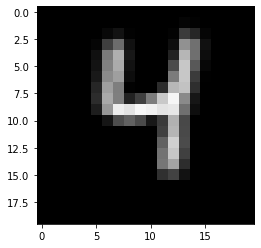

In [5]:
# 4 test에 넣고 확인하기
test = resize20('4.png')

In [6]:
check(test, train, train_labels)

array([[4.]], dtype=float32)

### 질문: opencv2가 아니라 sci kit learn을 사용하려면 에러가 뜨는 데 이거 해결하려면 어떻게 해야 되는지?

sci kit learn에 넣어야 하는 데이터 shape는??

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

NameError: name 'KNeighborsClassifier' is not defined

## train test split 써보기

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.3, random_state=1)

In [9]:
for i in range(10):
    print(y_test[i])

[5]
[9]
[7]
[6]
[5]
[7]
[5]
[2]
[1]
[1]


https://076923.github.io/posts/Python-opencv-43/

In [12]:
def check(test, train, train_labels):
    knn = cv2.ml.KNearest_create()
    knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
    # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
    ret, result, neighbours, dist = knn.findNearest(test, k=5)
    return result

In [13]:
retval = knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

In [ ]:
int(knn.findNearest(test,k=5)[1])

원래대로 풀어보기

일단 test의 shape를 모방해 X_test값을 하나 불러오기

In [76]:
test.shape

(1, 400)

In [79]:
temp = X_test[0].reshape(1,400)

In [117]:
fo i in range(len(train)):
    np.sum(int(knn.findNearest(temp,k=5)[1]) == int(y_test[i]))

6

In [25]:
a = []
for i in range(5000):
    t = knn.findNearest(X_test[i].reshape(1,400), k=5)
    a.append(t)

IndexError: index 1500 is out of bounds for axis 0 with size 1500

In [19]:
int(knn.findNearest(temp,k=5)[1])

NameError: name 'temp' is not defined

In [ ]:
test = X_test[i].reshape(1,400)

In [22]:
knn.findNearest(test,k=5)[1]

array([[4.]], dtype=float32)

In [17]:
y_test

array([[5],
       [9],
       [7],
       ...,
       [5],
       [2],
       [2]])

In [80]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
# 모델 돌림
# 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
ret, result, neighbours, dist = knn.findNearest(temp, k=5)

In [89]:
# 첫번째 값은 틀림
int(result[0]), int(y_test[0])

(6, 5)

### for 문으로 일반화하기

In [12]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

test 

for i in range(10):
    test = X_test[i].reshape(1,400)
    
    # 결과값에 int를 씌움
    print("예측값은", int(knn.findNearest(test,k=5)[1]), "입니다", "실제값은", int(y_test[i]), "입니다")

예측값은 6 입니다 실제값은 5 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 1 입니다 실제값은 1 입니다


In [ ]:
# 너무 많아서 에러가 뜸

# 질문 이거 에러 뜨는 이유?

In [13]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

for i in range(len(train)):
    test = X_test[i].reshape(1,400)

    # 결과값에 int를 씌움
    print("예측값은", int(knn.findNearest(test,k=5)[1]), "입니다", "실제값은", int(y_test[i]), "입니다")

예측값은 6 입니다 실제값은 5 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 1 입니다 실제값은 7 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 3 입니다 실제값은 5 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 1 입니다

예측값은 7 입니다 실제값은 7 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 9 입니다

예측값은 8 입니다 실제값은 8 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 6 입니다 실제값은 4 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 0 입니다

예측값은 0 입니다 실제값은 0 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 0 입니다 실제값은 2 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 6 입니다 실제값은 8 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 5 입니다 실제값은 5 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 7 입니다 실제값은 2 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 1 입니다 실제값은 1 입니다
예측값은 1 입니다 실제값은 4 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 0 입니다 실제값은 0 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 2 입니다 실제값은 2 입니다
예측값은 6 입니다 실제값은 6 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 4 입니다 실제값은 4 입니다
예측값은 9 입니다 실제값은 9 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 3 입니다 실제값은 3 입니다
예측값은 8 입니다 실제값은 8 입니다
예측값은 7 입니다 실제값은 7 입니다
예측값은 9 입니다

IndexError: index 1500 is out of bounds for axis 0 with size 1500

In [14]:
# 1500넘으면 안 되므로 전체 5000이니까
# 1000씩 나눠서 correct값 찾아보기
len(train)

5000

In [25]:
a = knn.findNearest(test,k=5)[1]
a

array([[2.]], dtype=float32)

In [26]:
b = y_test[7]
b

array([2])

In [27]:
a == b

array([[ True]])

In [29]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

correct = 0

for i in range(5000):
    test = X_test[i].reshape(1,400)
    
    a = knn.findNearest(test,k=5)[1]
    b = y_test[7]
    
    if a == b:
        correct +=1
        
print(correct)        

IndexError: index 1500 is out of bounds for axis 0 with size 1500

In [16]:
correct1

NameError: name 'correct1' is not defined

In [20]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

correct1 = 0

for i in range(1000, 1500):
    test = X_test[i].reshape(1,400)
    
    if int(knn.findNearest(test,k=5)[1]) == int(y_test[i]):
        correct1 +=1
print(correct1)

477


In [ ]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

correct = 0

for i in range(2000,3000):
    test = X_test[i].reshape(1,400)
    
    if int(knn.findNearest(test,k=5)[1]) == int(y_test[i]):
        correct +=1
print(correct)

In [ ]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

correct = 0

for i in range(3000,4000):
    test = X_test[i].reshape(1,400)
    
    if int(knn.findNearest(test,k=5)[1]) == int(y_test[i]):
        correct +=1
print(correct)

In [ ]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

correct = 0

for i in range(3000,len(train)):
    test = X_test[i].reshape(1,400)
    
    if int(knn.findNearest(test,k=5)[1]) == int(y_test[i]):
        correct +=1
print(correct)